In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%run pipeline.py
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
#plt.rcParams['ytick.left'] = True
#plt.rcParams['ytick.right'] = True
#plt.rcParams['xtick.top'] = True
#plt.rcParams['xtick.bottom'] = True
#plt.rcParams['ytick.minor.visible'] = True

In [2]:
path = '10arcmin_both'
sims = os.listdir('./%s'%path)

In [3]:
spec_q = []
spec_dla = []
for file in sims:
    if file.split('.')[0].split('_')[-1] == 'q':
        data = np.load('./%s/%s'%(path,file))
        spec_q.append(data)
    if file.split('.')[0].split('_')[-1] == 'dla':
        data = np.load('./%s/%s'%(path,file))
        spec_dla.append(data)
        
spec_q = np.concatenate(spec_q)
spec_dla = np.concatenate(spec_dla)

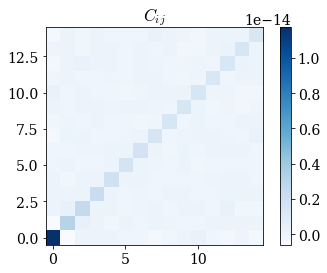

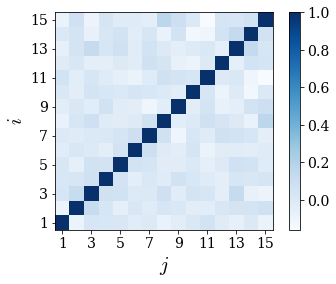

In [4]:
cov_q = np.cov(spec_q.T[0],bias=False)
r_q = np.corrcoef(spec_q.T[0])

plt.imshow(cov_q,origin='lower',cmap='Blues')
plt.colorbar()
plt.title(r'$C_{ij}$')
plt.show()

plt.imshow(r_q,origin='lower',cmap='Blues',extent=[0.5,15.5,0.5,15.5])
plt.colorbar()
#plt.title(r'$R_{ij}$')
plt.xticks(np.arange(1,17,2))
plt.yticks(np.arange(1,17,2))
plt.xlabel(r'$j$',fontsize=20)
plt.ylabel(r'$i$',fontsize=20)
plt.savefig('cov_q_10arcmin.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

In [5]:
std_q = np.sqrt(cov_q.diagonal())
np.save('std_q_10arcmin.npy',std_q)

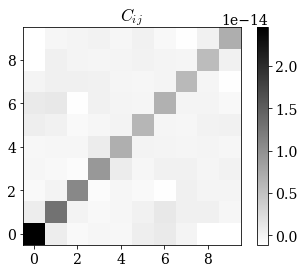

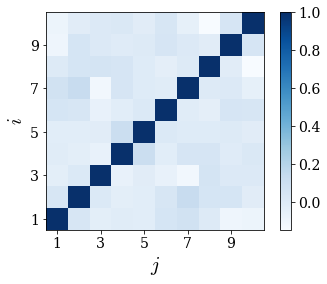

In [6]:
cov_dla = np.cov(spec_dla.T[0],bias=False)
r_dla = np.corrcoef(spec_dla.T[0])

plt.imshow(cov_dla,origin='lower',cmap='binary')
plt.colorbar()
plt.title(r'$C_{ij}$')
plt.show()

plt.imshow(r_dla,origin='lower',cmap='Blues',extent=[0.5,10.5,0.5,10.5])
plt.colorbar()
#plt.title(r'$R_{ij}$')
plt.xticks(np.arange(1,11,2))
plt.yticks(np.arange(1,11,2))
plt.xlabel(r'$j$',fontsize=20)
plt.ylabel(r'$i$',fontsize=20)
plt.savefig('cov_dla_10arcmin.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()